In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory data analysis (EDA)**

#Import supporting libraries

In [2]:
>>> import pandas as pd
>>> import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Case study/Cleaning2/Data.xlsx')

# Display the first 5 rows of the dataframe
df.head(2)

,UserLanguage,Country,Function,Function_8_TEXT,EDT,Leadership,Field,Applicable,Collab tools_1,Collab tools_2,...,No participation_5,No participation_6,No participation_7,No participation_8,Thoughts on learning,Q35,Q25,Q26,Q27,Q54
0,EN,Germany,Corporate functions,NaN,No,"Yes, I am part of the Top 100",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Female,41 - 50,5 - 10 years,NaN
1,DE,Germany,Corporate functions,NaN,No,"Yes, I am part of the Top 100",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,50 +,1 - 5 years,NaN


**# Checking Data types**

*   61 object
*   71 float



In [4]:
pd.set_option('display.max_rows', 500)
df.dtypes

,0
UserLanguage,object
Country,object
Function,object
Function_8_TEXT,object
EDT,object
Leadership,object
Field,object
Applicable,object
Collab tools_1,float64
Collab tools_2,float64



**Check 'Null' percentage in features**


*   81 columns contain a high percentage of null values, with nearly 90% of the data missing, indicating a lack of relevant information to support any meaningful analysis.






In [5]:
percent_missing = df.isnull().sum()/(len(df))*100
percent_missing.sort_values(ascending=False).head()

,0
Recommendation_9,100.000000
Recommendation_1,100.000000
Q79,99.682827
Q73,99.673765
Q82,99.655641


In [6]:
percent_missing_above_89 = percent_missing[percent_missing > 89]
percent_missing_above_89.sort_values(ascending=False).count()

85

**Check Info of dataset**

Currently,
*   11035 Records
*   135 columns


   
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Columns: 135 entries, UserLanguage to Q54
dtypes: float64(74), object(61)
memory usage: 11.4+ MB


In [8]:
df2=df

**Drop columns with highest null value.**

In [9]:
# Check columns before dropping
print("Before dropping:", len(df.columns))

# Drop columns    # drop maybe later 'No participation_6',	'No participation_8',	'No participation_4'
# 2ns drop two more column 'Function_8_TEXT, 'Leadership_1' , 'Leadership_2'
df2 = df2.drop(columns=[ 'Recommendation_1','Recommendation_9','Q79','Q73','Q82','Q46','Q88','Q85','Q76','Preferences_8_TEXT','Function_8_TEXT','Recommendation_4',
                       'Other thoughts.1','Recommendation_5',	'Recommendation_6',	'Q47',	'Recommendation_7',	'Recommendation_8_TEXT',	'Q27_9',
                        'Q84_2',	'Q27_7',	'Q27_6',	'Q27_8',	'Q27_5',	'Specialist leaders',	'Q84_4',	'Q27_3',	'Q84_1',	'Q27_2',	'Q27_4',
                        'Q27_1',	'Q84_3',	'Q78_4',	'Q78_3',	'Q78_2',	'Q78_6',	'Q78_1',	'Q78_7',	'Q78_8',	'Agile_3.1',	'Collab tools_3.1',
                        'Collab tools_2.1',	'Collab tools_1.1',	'Agile_2.1',	'Culture & mindset_3',	'Agile_1.1',	'Trends_6.1',	'Culture & mindset_1',
                        'Culture & mindset_2',	'Q54',	'Trends_2.1',	'Trends_4.1',	'Trends_3.1',	'Trends_1.1',	'Trends_5.1',	'Q78_5',	'Q81_1',	'Q81_2',
                        'Q87_4',	'Q87_5',	'Q87_6',	'Participation_5_TEXT',	'Q72_5',	'Q72_3',	'Q72_2',	'Q87_3',	'Q72_4',	'Q72_1',	'Q87_2',	'Q87_1',
                        'Awareness_4_TEXT',	'Q75_3',	'Q75_2',	'Q75_1',	'Thoughts on learning',	'Recommendation_2',	'Recommendation_3',	'Other thoughts',
                        'Leadership_1', 'Leadership_2'])

# Check columns after dropping
print("After dropping:", len(df2.columns))

Before dropping: 135
After dropping: 55


**Checking 1st duplicates**

In [10]:
#check duplicates
df2.duplicated().sum()

919

In [11]:
df2.isna().sum().head()

,0
UserLanguage,0
Country,183
Function,351
EDT,8580
Leadership,421


In [12]:
df3=df2
df3.duplicated().sum() #check duplicate on df3 dataframe

919

**Drop duplicates**

In [13]:
# lets drop duplicate at begining only got 0
df3=df2
df3= df3.drop_duplicates()
df3.duplicated().sum()

0

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserLanguage          11035 non-null  object 
 1   Country               10852 non-null  object 
 2   Function              10684 non-null  object 
 3   EDT                   2455 non-null   object 
 4   Leadership            10614 non-null  object 
 5   Field                 7686 non-null   object 
 6   Applicable            9881 non-null   object 
 7   Collab tools_1        8972 non-null   float64
 8   Collab tools_2        8614 non-null   float64
 9   Collab tools_3        7553 non-null   float64
 10  Agile_1               5594 non-null   float64
 11  Agile_2               5439 non-null   float64
 12  Agile_3               4831 non-null   float64
 13  Trends_1              3675 non-null   float64
 14  Trends_2              3537 non-null   float64
 15  Trends_3           

AttributeError: 'NoneType' object has no attribute 'head'

**Drop rows that has 'NA' in following columns**

In [14]:
# remove row that has NA in below columns
df3 = df3.dropna(subset=['Function', 'Country', 'UserLanguage', 'Leadership','Participation yes/no'])

**Check current information of data**
 - index: 8185  entries
 - Data columns (total 55 columns)

In [15]:
df3.info()              #index: 8185  entries, 0 to 11030
                        #Data columns (total 55 columns)

<class 'pandas.core.frame.DataFrame'>
Index: 8183 entries, 0 to 11030
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserLanguage          8183 non-null   object 
 1   Country               8183 non-null   object 
 2   Function              8183 non-null   object 
 3   EDT                   1933 non-null   object 
 4   Leadership            8183 non-null   object 
 5   Field                 5906 non-null   object 
 6   Applicable            7743 non-null   object 
 7   Collab tools_1        7463 non-null   float64
 8   Collab tools_2        7174 non-null   float64
 9   Collab tools_3        6315 non-null   float64
 10  Agile_1               4827 non-null   float64
 11  Agile_2               4693 non-null   float64
 12  Agile_3               4162 non-null   float64
 13  Trends_1              3263 non-null   float64
 14  Trends_2              3154 non-null   float64
 15  Trends_3              332

**Again check it is removed properly**

In [16]:
df3.isna().sum().head()

,0
UserLanguage,0
Country,0
Function,0
EDT,6250
Leadership,0


**Again check duplicate if any left**
- good all duplicate is removed

In [17]:
df3.duplicated().sum()

0

**Correlation Matrix**

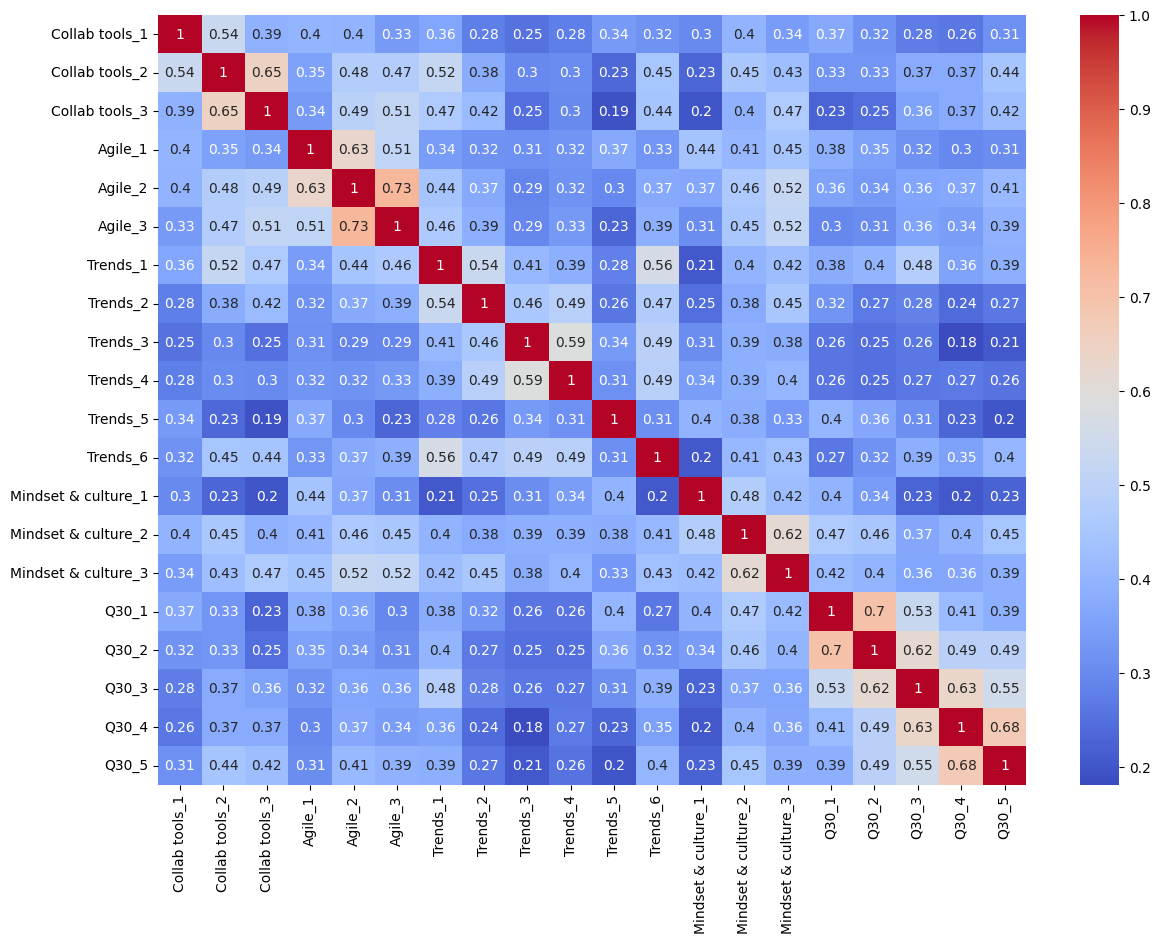

In [25]:
# @title Default title text
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy import stats

selected_columns = ['Collab tools_1', 'Collab tools_2', 'Collab tools_3', 'Agile_1',
       'Agile_2', 'Agile_3', 'Trends_1', 'Trends_2', 'Trends_3', 'Trends_4',
       'Trends_5', 'Trends_6', 'Mindset & culture_1', 'Mindset & culture_2',
       'Mindset & culture_3', 'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5']

correlation_matrix = df2[selected_columns].corr()

plt.figure(figsize=(14, 10))
#mask = np.zeros_like(correlation_matrix, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
   #OR
#sns.heatmap(correlation_matrix, vmax=1.0, vmin=0, center=0, annot=True,
            #square=False, linewidths=.01,cbar_kws={"shrink": 0.75}, cmap='coolwarm', mask = mask)

plt.show()

Drop correlated column

In [19]:
# these columns are correlated lets drop it


df4 = df3.drop(columns=['Q30_1','Agile_3', 'Trends_6', 'Trends_2', 'Trends_1', 'Trends_4', 'Trends_3', 'Mindset & culture_3','Mindset & culture_1','Agile_1'])
df4.duplicated().sum()

0

In [20]:
# Index: 8183 entries, 0 to 11030
#Data columns (total 45 columns):

df4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8183 entries, 0 to 11030
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserLanguage          8183 non-null   object 
 1   Country               8183 non-null   object 
 2   Function              8183 non-null   object 
 3   EDT                   1933 non-null   object 
 4   Leadership            8183 non-null   object 
 5   Field                 5906 non-null   object 
 6   Applicable            7743 non-null   object 
 7   Collab tools_1        7463 non-null   float64
 8   Collab tools_2        7174 non-null   float64
 9   Collab tools_3        6315 non-null   float64
 10  Agile_2               4693 non-null   float64
 11  Trends_5              3539 non-null   float64
 12  Mindset & culture_2   6860 non-null   float64
 13  Specialist role       7743 non-null   object 
 14  Q30_2                 1345 non-null   float64
 15  Q30_3                 121

In [21]:
df4.describe()

,Collab tools_1,Collab tools_2,Collab tools_3,Agile_2,Trends_5,Mindset & culture_2,Q30_2,Q30_3,Q30_4,Q30_5
count,7463.000000,7174.000000,6315.000000,4693.000000,3539.000000,6860.000000,1345.000000,1212.000000,1143.000000,1269.000000
mean,3.962482,3.010176,2.435629,3.110377,3.853066,3.177551,3.544238,2.863861,2.580927,3.098503
std,0.997148,1.298062,1.343610,1.218011,1.001355,1.249449,1.113238,1.252096,1.359363,1.313209
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000
50%,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,5.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
#lets NA% on missing value
percent_missing2 = df4.isnull().sum()/(len(df))*100
percent_missing2.sort_values(ascending=False)

,0
No participation_6,64.748527
No participation_8,64.558224
No participation_4,64.041686
Q30_4,63.797010
No participation_5,63.552333
No participation_3,63.479837
Q30_3,63.171726
No participation_2,62.754871
Q30_5,62.655188
Q30_2,61.966470


In [ ]:
df4.info()

**Select columns that are Object**

In [24]:
df4.select_dtypes(include=['object']).columns

Index(['UserLanguage', 'Country', 'Function', 'EDT', 'Leadership', 'Field',
       'Applicable', 'Specialist role', 'Participation yes/no', 'Evaluation_1',
       'Evaluation_2', 'Evaluation_3', 'Evaluation_4', 'Evaluation_5',
       'Evaluation_6', 'Evaluation_7', 'Evaluation_8', 'Evaluation_9',
       'Evaluation_10', 'Preferences', 'Awareness', 'Participation',
       'Recommendation_8', 'No participation_1', 'No participation_2',
       'No participation_3', 'No participation_4', 'No participation_5',
       'No participation_6', 'No participation_7', 'No participation_8', 'Q35',
       'Q25', 'Q26', 'Q27'],
      dtype='object')

***Filling NA with missing ***

In [26]:
df4.dtypes
df4.fillna('missing', inplace=True)
df4[df4.select_dtypes(include=['object']).columns] = df4.select_dtypes(include=['object']).astype(str)

**Now let using labelEncoder**:Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

* This has been done so that correlation can be seen for categorical data.



In [27]:
# Initialize the LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#df4['Evaluation_2_coded']=le.fit_transform(df4['Evaluation_2'])
df4['UserLanguage_coded']=le.fit_transform(df4['UserLanguage'])
df4['Applicable_coded']=le.fit_transform(df4['Applicable'])
df4['Evaluation_2_coded']=le.fit_transform(df4['Evaluation_2'])
df4['Evaluation_6_coded']=le.fit_transform(df4['Evaluation_6'])
df4['Evaluation_10_coded']=le.fit_transform(df4['Evaluation_10'])
df4['Recommendation_8_coded']=le.fit_transform(df4['Recommendation_8'])
df4['No participation_3_coded']=le.fit_transform(df4['No participation_3'])
df4['No participation_6_coded']=le.fit_transform(df4['No participation_6'])
df4['Q25_coded']=le.fit_transform(df4['Q25'])
df4['Country_coded']=le.fit_transform(df4['Country'])
df4['Specialist role_coded']=le.fit_transform(df4['Specialist role'])
df4['Evaluation_3_coded']=le.fit_transform(df4['Evaluation_3'])
df4['Evaluation_7_coded']=le.fit_transform(df4['Evaluation_7'])
df4['Preferences_coded']=le.fit_transform(df4['Preferences'])
df4['No participation_1_coded']=le.fit_transform(df4['No participation_1'])
df4['No participation_4_coded']=le.fit_transform(df4['No participation_4'])
df4['No participation_7_coded']=le.fit_transform(df4['No participation_7'])
df4['Q26_coded']=le.fit_transform(df4['Q26'])
df4['Function_coded']=le.fit_transform(df4['Function'])
df4['Participation yes/no_coded']=le.fit_transform(df4['Participation yes/no'])
df4['Evaluation_4_coded']=le.fit_transform(df4['Evaluation_4'])
df4['Evaluation_8_coded']=le.fit_transform(df4['Evaluation_8'])
df4['Awareness_coded']=le.fit_transform(df4['Awareness'])
df4['No participation_2_coded']=le.fit_transform(df4['No participation_2'])
df4['No participation_5_coded']=le.fit_transform(df4['No participation_5'])
df4['No participation_8_coded']=le.fit_transform(df4['No participation_8'])
df4['Q27_coded']=le.fit_transform(df4['Q27'])
df4['EDT_coded']=le.fit_transform(df4['EDT'])
df4['Evaluation_1_coded']=le.fit_transform(df4['Evaluation_1'])
df4['Evaluation_5_coded']=le.fit_transform(df4['Evaluation_5'])
df4['Evaluation_9_coded']=le.fit_transform(df4['Evaluation_9'])
df4['Participation_coded']=le.fit_transform(df4['Participation'])
df4['Leadership_coded']=le.fit_transform(df4['Leadership'])
df4['Field_coded']=le.fit_transform(df4['Field'])
df4['Q35_coded']=le.fit_transform(df4['Q35'])

df4.head()

,UserLanguage,Country,Function,EDT,Leadership,Field,Applicable,Collab tools_1,Collab tools_2,Collab tools_3,...,No participation_8_coded,Q27_coded,EDT_coded,Evaluation_1_coded,Evaluation_5_coded,Evaluation_9_coded,Participation_coded,Leadership_coded,Field_coded,Q35_coded
0,EN,Germany,Corporate functions,No,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,2,0,4,4,4,58,3,3,15
1,DE,Germany,Corporate functions,No,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,0,0,5,2,5,21,3,3,15
2,DE,Germany,Energy networks,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,2,7,7,3,0,3,3,12
3,EN,Germany,Corporate functions,Yes,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,0,1,10,10,10,0,3,3,15
4,DE,Germany,Corporate functions,No,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,0,9,4,9,4,3,3,15


**Correlation Matrix Relation [Categorical]**

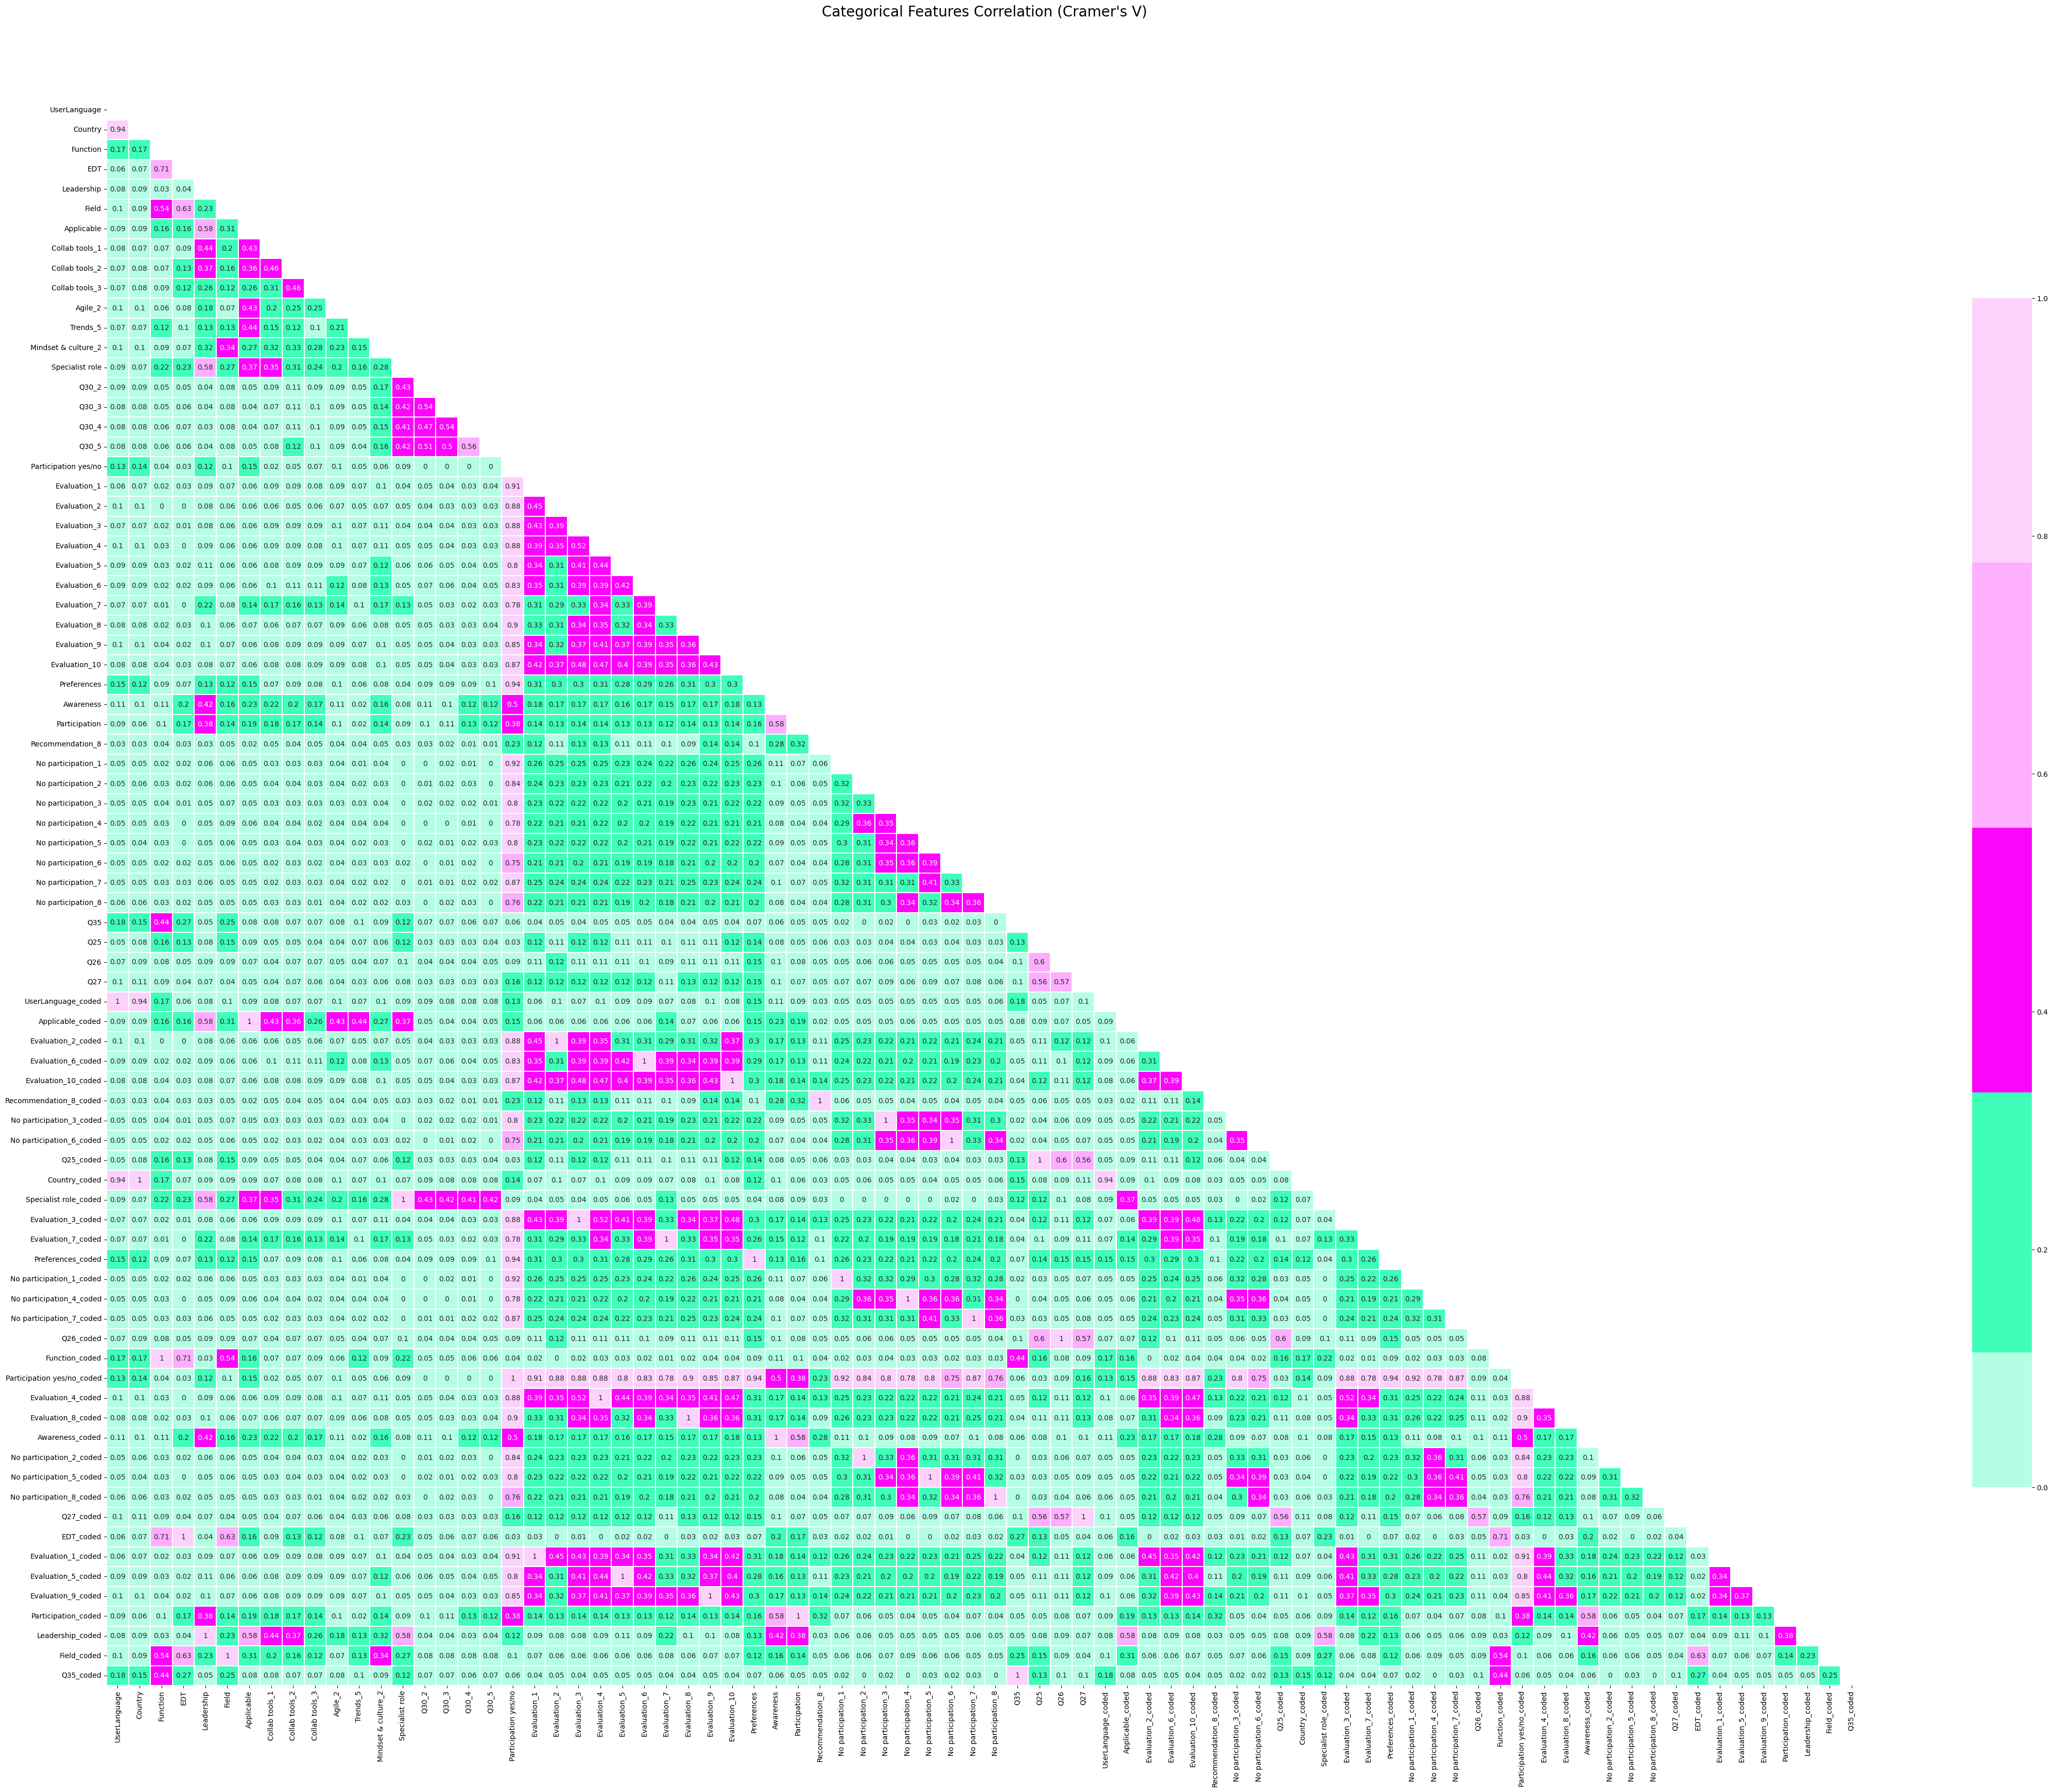

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy import stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = df4
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(55, 40), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

**As there are NA in below columns, hence fill null cells with 'Not Disclosed'**

In [30]:
# immpute  NA of Q25, Q26, Q27

df4['Q25'] = df4['Q25'].fillna('Not Disclosed')
df4['Q26'] = df4['Q26'].fillna('Not Disclosed')
df4['Q27'] = df4['Q27'].fillna('Not Disclosed')

**iloc is great feature to see the records of dataset for specific rows**

In [33]:
df4.iloc[20:27]

,UserLanguage,Country,Function,EDT,Leadership,Field,Applicable,Collab tools_1,Collab tools_2,Collab tools_3,...,No participation_8_coded,Q27_coded,EDT_coded,Evaluation_1_coded,Evaluation_5_coded,Evaluation_9_coded,Participation_coded,Leadership_coded,Field_coded,Q35_coded
20,DE,Germany,Customer solutions,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,3,2,9,0,3,58,3,3,5
21,DE,Germany,Corporate functions,Yes,"No, I do not lead other employees or project t...",missing,I regularly work on a computer and use Microso...,3.0,2.0,1.0,...,10,1,1,2,10,5,20,0,3,15
22,DE,Germany,Energy networks,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,2,6,0,1,7,3,3,7
23,DE,Germany,Customer solutions,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,2,3,9,1,0,3,3,7
24,EN,United Kingdom,Customer solutions,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,2,6,7,7,0,3,3,15
25,DE,Germany,Corporate functions,Yes,"No, I do not lead other employees or project t...",missing,I regularly work on a computer and use Microso...,3.0,3.0,3.0,...,10,1,1,6,10,5,3,0,3,15
26,EN,Germany,Customer solutions,missing,"Yes, I am part of the Top 100",missing,missing,missing,missing,missing,...,10,1,2,6,4,5,45,3,3,7


* Ignore this as it was for rough side. Try and test

In [144]:
import numpy as np         # this to replace 1 to 10 rating
import pandas as pd

# Define the function
def process_collab_tools(column):
    column = pd.Series(column).replace({'Strongly Disagree 1':'Extremely Poor', '2': 'Very Poor', '3': 'Poor', '4': 'Below Average', '5': 'Average', '6':'Slightly Above Average', '7': 'Good', '8': 'Very Good', '9':'Excellent', 'Strongly agree 10':'Outstanding'})
    return column

df4['Evaluation_1']=process_collab_tools(df4['Evaluation_1'])
df4['Evaluation_2']=process_collab_tools(df4['Evaluation_2'])
df4['Evaluation_3']=process_collab_tools(df4['Evaluation_3'])
df4['Evaluation_4']=process_collab_tools(df4['Evaluation_4'])
df4['Evaluation_5']=process_collab_tools(df4['Evaluation_5'])
df4['Evaluation_6']=process_collab_tools(df4['Evaluation_6'])
df4['Evaluation_7']=process_collab_tools(df4['Evaluation_7'])
df4['Evaluation_8']=process_collab_tools(df4['Evaluation_8'])
df4['Evaluation_9']=process_collab_tools(df4['Evaluation_9'])
df4['Evaluation_10']=process_collab_tools(df4['Evaluation_10'])



This is same as above, just here we are creating new column for Evaluation i.e "N_Evaluation" to retain original data.

In [34]:
# This is same as above, just here we are creating new column for Evaluation i.e "N_Evaluation" to retain original data.
import numpy as np         # this to replace 1 to 10 rating
import pandas as pd

# Define the function
def process_collab_tools(column):
    column = pd.Series(column).replace({'Strongly Disagree 1':'1_Extremely Poor', '2': '2_Very Poor', '3': '3_Poor', '4': '4_Below Average', '5': '5_Average', '6':'6_Slightly Above Average', '7': '7_Good', '8': '8_Very Good', '9':'9_Excellent', '1Strongly agree 10':'10_Outstanding'})
    return column

df4['N_Evaluation_1']=process_collab_tools(df4['Evaluation_1'])
df4['N_Evaluation_2']=process_collab_tools(df4['Evaluation_2'])
df4['N_Evaluation_3']=process_collab_tools(df4['Evaluation_3'])
df4['N_Evaluation_4']=process_collab_tools(df4['Evaluation_4'])
df4['N_Evaluation_5']=process_collab_tools(df4['Evaluation_5'])
df4['N_Evaluation_6']=process_collab_tools(df4['Evaluation_6'])
df4['N_Evaluation_7']=process_collab_tools(df4['Evaluation_7'])
df4['N_Evaluation_8']=process_collab_tools(df4['Evaluation_8'])
df4['N_Evaluation_9']=process_collab_tools(df4['Evaluation_9'])
df4['N_Evaluation_10']=process_collab_tools(df4['Evaluation_10'])


This is same as above, just here we are creating new column for below columns
and replacing rating 1 to 5 with meaningful way.

In [36]:
# This is same as above, just here we are creating new column for Evaluation i.e "N_.." to retain original data.
# here we have named 1 tp 5 rating of below column
import numpy as np
import pandas as pd

# Define the function
def process_collab_tools(column):
    column = pd.Series(column).replace({1:'1_Not Yet', 2: '2_Developing', 3: '3_Adequately Developed', 4: '4_Well Developed', 5: '5_Outstanding'})
    return column

# Example usage with df4['Collab tools_1']
df4['N_Collab tools_1']=process_collab_tools(df4['Collab tools_1'])
df4['N_Collab tools_2']=process_collab_tools(df4['Collab tools_2'])
df4['N_Collab tools_3']=process_collab_tools(df4['Collab tools_3'])
df4['N_Agile_2']=process_collab_tools(df4['Agile_2'])
df4['N_Trends_5']=process_collab_tools(df4['Trends_5'])
df4['N_Mindset & culture_2']=process_collab_tools(df4['Mindset & culture_2'])
df4['N_Q30_2']=process_collab_tools(df4['Q30_2'])
df4['N_Q30_3']=process_collab_tools(df4['Q30_3'])
df4['N_Q30_4']=process_collab_tools(df4['Q30_4'])
df4['N_Q30_5']=process_collab_tools(df4['Q30_5'])

* Rough side

In [122]:
# here we have named 1 tp 5 rating of below column
import numpy as np
import pandas as pd

# Define the function
def process_collab_tools(column):
    column = pd.Series(column).replace({1:'Not Yet', 2: 'Developing', 3: 'Adequately Developed', 4: 'Well Developed', 5: 'Outstanding'})
    return column

# Example usage with df4['Collab tools_1']
df4['Collab tools_1']=process_collab_tools(df4['Collab tools_1'])
df4['Collab tools_2']=process_collab_tools(df4['Collab tools_2'])
df4['Collab tools_3']=process_collab_tools(df4['Collab tools_3'])
df4['Agile_2']=process_collab_tools(df4['Agile_2'])
df4['Trends_5']=process_collab_tools(df4['Trends_5'])
df4['Mindset & culture_2']=process_collab_tools(df4['Mindset & culture_2'])
df4['Q30_2']=process_collab_tools(df4['Q30_2'])
df4['Q30_3']=process_collab_tools(df4['Q30_3'])
df4['Q30_4']=process_collab_tools(df4['Q30_4'])
df4['Q30_5']=process_collab_tools(df4['Q30_5'])

**Now check duplicateif any?**

In [37]:
#Okay no duplicate found
df4.duplicated().sum()

0

In [165]:
# lets export the Data
df4.to_csv('CleanData_6oct_V3.csv')

In [126]:
df5=df4